In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_set =  pd.read_csv(r'C:/Users/Akhila/OneDrive/Desktop/Major-Project/Major Project/dataset/Corona_NLP_train.csv', encoding="ISO-8859-1")
test_set =  pd.read_csv(r'C:/Users/Akhila/OneDrive/Desktop/Major-Project/Major Project/dataset/Corona_NLP_test.csv', encoding="ISO-8859-1")


In [3]:
train_set['OriginalTweet']=train_set['OriginalTweet'].str.lower()
test_set['OriginalTweet']=test_set['OriginalTweet'].str.lower()

## Exploratory Data Analysis

In [4]:
train_set.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
train_set.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
test_set.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,trending: new yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,when i couldn't find hand sanitizer at fred me...,Positive
2,3,44955,NaN,02-03-2020,find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#panic buying hits #newyork city as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [9]:
test_set.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

## Tweet Place(Location of Tweets) to the count of tweets

In [10]:
train_set.Location.value_counts(dropna=False)[:20]

NaN                        8590
London                      540
United States               528
London, England             520
New York, NY                395
Washington, DC              373
United Kingdom              337
Los Angeles, CA             281
India                       268
UK                          232
Australia                   225
USA                         223
Canada                      191
England, United Kingdom     191
Toronto, Ontario            160
Global                      159
Chicago, IL                 155
California, USA             153
San Francisco, CA           152
Boston, MA                  150
Name: Location, dtype: int64

In [11]:
train_set.Location = train_set.Location.str.split(",").str[0]

c:\users\akhila\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


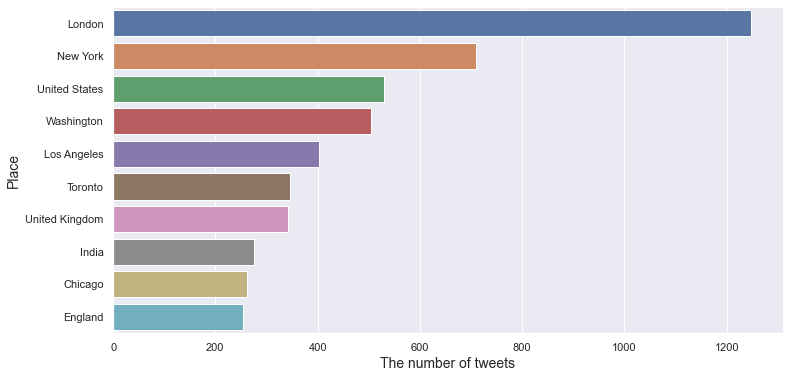

In [12]:

sns.set(rc={'figure.figsize':(11,4)})
plt.figure(figsize=(12,6))
sns.barplot(train_set["Location"].value_counts().values[:10], train_set["Location"].value_counts().index[:10]);
plt.xlabel("The number of tweets",fontsize=14)
plt.ylabel("Place",fontsize=14)
sns.set_style('white')
plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

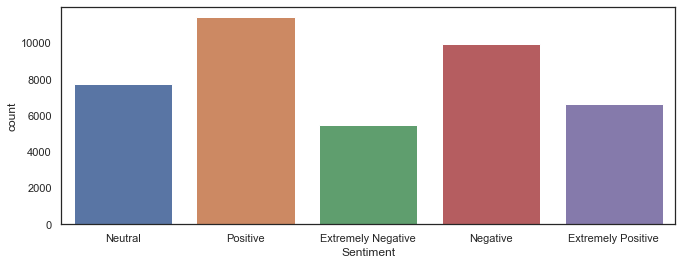

In [13]:
sns.countplot(x = "Sentiment", data = train_set)

In [14]:
encoded_label = {'Extremely Negative': 0,'Negative': 0,'Neutral': 1,'Positive':2,'Extremely Positive': 2}
labels = ['Negative', 'Neutral', 'Positive']
train_set["Sentiment"].replace(encoded_label, inplace=True)
test_set["Sentiment"].replace(encoded_label, inplace=True)

In [15]:
train_set['Sentiment'].value_counts() 

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

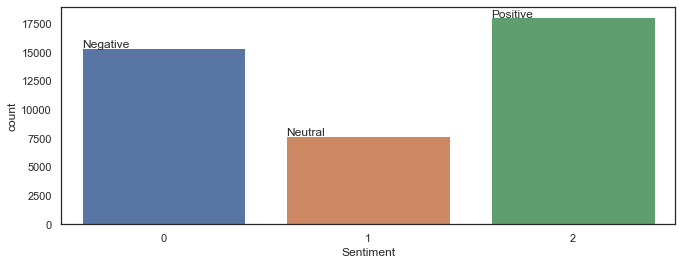

In [16]:
ax=sns.countplot(x = "Sentiment", data = train_set)
for p, label in zip(ax.patches, ['Negative', 'Neutral', 'Positive']):
    ax.annotate(label, (p.get_x(), p.get_height()))

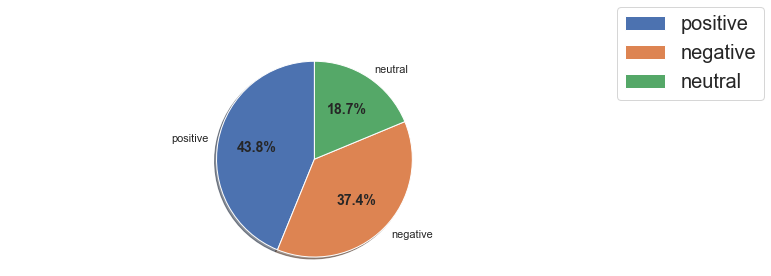

In [17]:
fig1, ax1 = plt.subplots()
pie=ax1.pie(train_set['Sentiment'].value_counts(),labels=['positive','negative','neutral'], explode= (0, 0, 0) , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.setp(pie[2],size = 14, weight ="bold")
ax1.legend(pie[0], ['positive','negative','neutral'], fontsize=20, bbox_to_anchor=(1.25, 1.25))
plt.show()

# Data Preprocessing

In [18]:
train_set.drop_duplicates(inplace = True)
test_set.drop_duplicates(inplace = True)

In [19]:
train_set_check = train_set.copy()
test_set_check = test_set.copy()

In [20]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akhila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akhila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
sentences = train_set['OriginalTweet'][:5]

for i in sentences[3:4]:
    print("Original:\n")
    print(i)
    print('\nTensorflow Tokenizer\n:')
    a = Tokenizer()
    a.fit_on_texts([i])
    print(a.word_index)
    print("\nTweet Tokenizer:\n")
    print(TweetTokenizer().tokenize(i))
    print('\nNLTK word_tokenizer:\n')
    print(word_tokenize(i))

Original:






#covid19france #covid_19 #covid19 #coronavirus #confinement #confinementotal #confinementgeneral https://t.co/zrlg0z520j

Tensorflow Tokenizer
:
{'\r\r': 1, 'food': 2, 'is': 3, 'not': 4, 'you': 5, 'stay': 6, 'my': 7, 'stock': 8, 'the': 9, 'only': 10, 'one': 11, 'which': 12, 'empty': 13, 'please': 14, "don't": 15, 'panic': 16, 'there': 17, 'will': 18, 'be': 19, 'enough': 20, 'for': 21, 'everyone': 22, 'if': 23, 'do': 24, 'take': 25, 'more': 26, 'than': 27, 'need': 28, 'calm': 29, 'safe': 30, 'covid19france': 31, 'covid': 32, '19': 33, 'covid19': 34, 'coronavirus': 35, 'confinement': 36, 'confinementotal': 37, 'confinementgeneral': 38, 'https': 39, 't': 40, 'co': 41, 'zrlg0z520j': 42}

Tweet Tokenizer:

['my', 'food', 'stock', 'is', 'not', 'the', 'only', 'one', 'which', 'is', 'empty', '...', 'please', ',', "don't", 'panic', ',', 'there', 'will', 'be', 'enough', 'food', 'for', 'everyone', 'if', 'you', 'do', 'not', 'take', 'more', 'than', 'you', 'need', '.', 'stay', 'calm',

## Tweets Cleaning

In [24]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def Data_cleaning(data):
    # Here urls are removed 
    tweet_without_url = re.sub(r'http\S+', ' ', data)
    
    # hashtags are removed here
    tweet_without_hashtag = re.sub(r'#\w+',' ', tweet_without_url)
    
    # Remove unknown characters and emojis
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    # tensorflow Tokenizer
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    # Punctuation Removal
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    # Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    # Lemmatizing
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    
    return " ".join(text_cleaned)

In [25]:
train_set_check['OriginalTweet'] = train_set_check['OriginalTweet'].apply(lambda x: Data_cleaning(x))

In [26]:
train_set_check=train_set_check.iloc[:, [4,5]]

In [27]:
test_set_check['OriginalTweet'] = test_set_check['OriginalTweet'].apply(lambda x: Data_cleaning(x))

In [28]:
test_set_check=test_set_check.iloc[:, [4,5]]

In [29]:
train_set_check

,OriginalTweet,Sentiment
0,,1
1,advice talk neighbour family exchange phone nu...,2
2,coronavirus australia woolworth give elderly d...,2
3,food stock one empty please panic enough food ...,2
4,ready go supermarket outbreak paranoid food st...,0
...,...,...
41152,airline pilot offering stock supermarket shelf...,1
41153,response complaint provided citing covid relat...,0
41154,know getting tough rationing toilet paper mart...,2
41155,wrong smell hand sanitizer starting turn,1


# Word Cloud 

In [30]:
from wordcloud import WordCloud

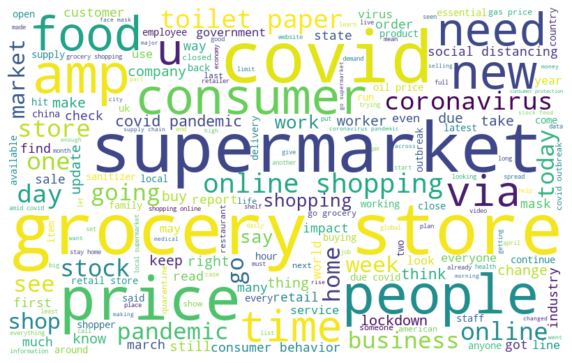

In [31]:
words_neutral = ' '.join([tweet for tweet in train_set_check['OriginalTweet'][train_set_check['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = "white",width = 800, height = 500,
 max_font_size = 110).generate(words_neutral)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

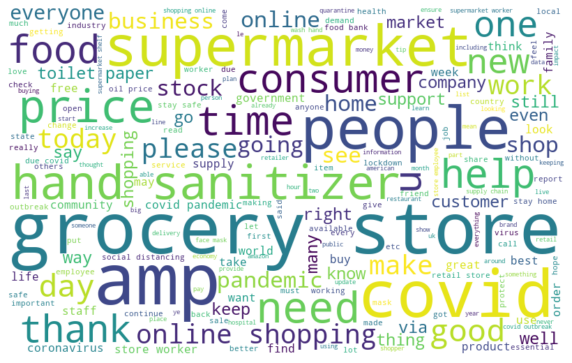

In [32]:
words_positive = ' '.join([tweet for tweet in train_set_check['OriginalTweet'][train_set_check['Sentiment'] == 2]])

wordcloud = WordCloud(background_color = "white",width = 800, height = 500, random_state = 21, max_font_size = 110).generate(words_positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

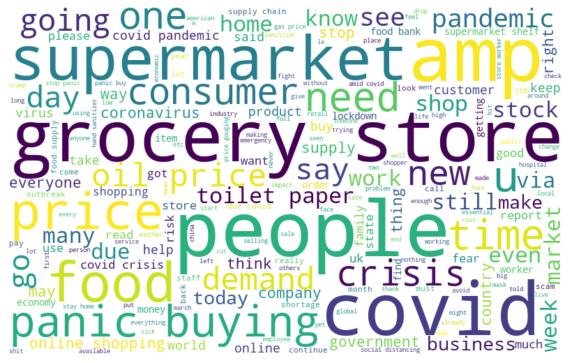

In [33]:
words_neutral = ' '.join([tweet for tweet in train_set_check['OriginalTweet'][train_set_check['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = "white", width = 800, height = 500, random_state = 21, max_font_size = 110).generate(words_neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Machine Learning models-Train and test

In [34]:
import sys
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import pickle

In [35]:
tfidf = TfidfVectorizer() #TF-IDF
print("Start Naive Bayes Classification")
nb_pipeline = Pipeline([('lrgTF_IDF', tfidf), ('lrg_mn', BernoulliNB())])
filename = 'nb_model.pkl'
pickle.dump(nb_pipeline.fit(train_set_check['OriginalTweet'], train_set_check['Sentiment']), open(filename, 'wb'))
print("Naive Bayes Model Successfully Trained")

Start Naive Bayes Classification
Naive Bayes Model Successfully Trained


In [36]:
filename = 'nb_model.pkl'
train = pickle.load(open(filename, 'rb'))
predicted_class = train.predict(test_set_check["OriginalTweet"])


In [37]:
def model_assessment(y_test, predicted_class):
    accuracy = accuracy_score(y_test, predicted_class)
    score = f1_score(y_test, predicted_class,average='weighted')
    print("Confusion Matrix")
    print(confusion_matrix(y_test, predicted_class))
    print("Accuracy: ",accuracy*100)
    print("F1-score: ",score*100)
model_assessment(test_set_check['Sentiment'], predicted_class)

Confusion Matrix
[[1207   89  337]
 [ 133  330  156]
 [ 288   57 1201]]
Accuracy:  72.09057398630858
F1-score:  71.82954333572299


In [38]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
tfidf = TfidfVectorizer() #TF-IDF
print("Start SVM Classification")
svm_pipeline = Pipeline([('TF_IDF', tfidf), ('scv_ml', CalibratedClassifierCV(LinearSVC()))])

filename = 'svm_model.pkl'
pickle.dump(svm_pipeline.fit(train_set_check['OriginalTweet'], train_set_check['Sentiment']), open(filename, 'wb'))

print("SVM Model Successfully Trained")

Start SVM Classification
SVM Model Successfully Trained


In [39]:
filename = 'svm_model.pkl'
train = pickle.load(open(filename, 'rb'))
predicted_class = train.predict(test_set_check["OriginalTweet"])

model_assessment(test_set_check['Sentiment'], predicted_class)

Confusion Matrix
[[1342   80  211]
 [ 108  412   99]
 [ 139   45 1362]]
Accuracy:  82.04318062137968
F1-score:  81.89106485344902


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
print("Start RandomForest Classification")
random_pipeline =  Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("classifier", RandomForestClassifier( random_state=100)),
    ]
)
filename = 'rf_model.pkl'
pickle.dump(random_pipeline.fit(train_set_check['OriginalTweet'], train_set_check['Sentiment']), open(filename, 'wb'))
print("RandomForest Model Successfully Trained")

Start RandomForest Classification
RandomForest Model Successfully Trained


In [41]:
filename = 'rf_model.pkl'
train = pickle.load(open(filename, 'rb'))
predicted_class = train.predict(test_set_check["OriginalTweet"])

model_assessment(test_set_check['Sentiment'], predicted_class)

Confusion Matrix
[[1177  123  333]
 [ 118  368  133]
 [ 257   71 1218]]
Accuracy:  72.74881516587678
F1-score:  72.63443794712039


In [42]:
from sklearn.linear_model import LogisticRegression
print("Start Logistic Regression Classification")
lg_pipeline =  Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("classifier", LogisticRegression(penalty='l1',solver='liblinear',  random_state=0,max_iter=1000)),
    ]
)
filename = 'lg_model.pkl'
pickle.dump(lg_pipeline.fit(train_set_check['OriginalTweet'], train_set_check['Sentiment']), open(filename, 'wb'))
print("Successfully Trained")

Start Logistic Regression Classification
Successfully Trained


In [43]:
filename = 'lg_model.pkl'
train = pickle.load(open(filename, 'rb'))
predicted_class = train.predict(test_set_check["OriginalTweet"])

model_assessment(test_set_check['Sentiment'], predicted_class)

Confusion Matrix
[[1345  100  188]
 [  56  502   61]
 [ 135   52 1359]]
Accuracy:  84.41284886782518
F1-score:  84.43002759463072


In [44]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('svm', svm_pipeline), ('lr', lg_pipeline)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

In [45]:
from sklearn.model_selection import train_test_split
X_train=train_set_check['OriginalTweet']
X_test=test_set_check['OriginalTweet']
y_train=train_set_check['Sentiment']
y_test=test_set_check['Sentiment']

In [46]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('TF_IDF', TfidfVectorizer()),
                                              ('scv_ml',
                                               CalibratedClassifierCV(base_estimator=LinearSVC()))])),
                             ('lr',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('classifier',
                                               LogisticRegression(max_iter=1000,
                                                                  penalty='l1',
                                                                  random_state=0,
                                                                  solver='liblinear'))]))],
                 voting='soft')

In [47]:
pickle.dump(ensemble.fit(X_train, y_train), open('ensemble.pkl', 'wb'))
predicted_class = ensemble.predict(X_test)
model_assessment(y_test, predicted_class)

Confusion Matrix
[[1353   82  198]
 [  80  465   74]
 [ 129   46 1371]]
Accuracy:  83.9652448657188
F1-score:  83.92154098992238
